In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
spotify = pd.read_csv('/Users/lyly/Downloads/spotify.csv')
print(spotify)

          Date  Shape of You  Despacito  Something Just Like This    HUMBLE.  \
0     1/6/2017      12287078        NaN                       NaN        NaN   
1     1/7/2017      13190270        NaN                       NaN        NaN   
2     1/8/2017      13099919        NaN                       NaN        NaN   
3     1/9/2017      14506351        NaN                       NaN        NaN   
4    1/10/2017      14275628        NaN                       NaN        NaN   
..         ...           ...        ...                       ...        ...   
361   1/5/2018       4492978  3450315.0                 2408365.0  2685857.0   
362   1/6/2018       4416476  3394284.0                 2188035.0  2559044.0   
363   1/7/2018       4009104  3020789.0                 1908129.0  2350985.0   
364   1/8/2018       4135505  2755266.0                 2023251.0  2523265.0   
365   1/9/2018       4168506  2791601.0                 2058016.0  2727678.0   

     Unforgettable  
0              NaN

In [345]:
#data wrangling
spotify.info()
spotify['Date'] = pd.to_datetime(spotify['Date'])
spotify_0 = spotify.fillna(0)
spotify_0['Despacito'] = spotify_0['Despacito'].astype('int64')
spotify_0['Something Just Like This'] = spotify_0['Something Just Like This'].astype('int64')
spotify_0['HUMBLE.'] = spotify_0['HUMBLE.'].astype('int64')
spotify_0['Unforgettable'] = spotify_0['Unforgettable'].astype('int64')
spotify_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      366 non-null    datetime64[ns]
 1   Shape of You              366 non-null    int64         
 2   Despacito                 359 non-null    float64       
 3   Something Just Like This  319 non-null    float64       
 4   HUMBLE.                   282 non-null    float64       
 5   Unforgettable             275 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      366 non-null    datetime64[ns]
 1   Shape of You              366 non-n

In [346]:
#data aggregation: streaming numbers grouped by year_month
spotify_0['year_month'] = spotify_0['Date'].dt.strftime('%Y_%m')                                                   
gross_shapeofyou = spotify_0.groupby('year_month', as_index=False).agg({'Shape of You': sum})
gross_despacito = spotify_0.groupby('year_month', as_index=False).agg({'Despacito': sum})
gross_something = spotify_0.groupby('year_month', as_index=False).agg({'Something Just Like This': sum})
gross_humble = spotify_0.groupby('year_month', as_index=False).agg({'HUMBLE.': sum})
gross_unforget = spotify_0.groupby('year_month', as_index=False).agg({'Unforgettable': sum})

print(spotify_0)

          Date  Shape of You  Despacito  Something Just Like This  HUMBLE.  \
0   2017-01-06      12287078          0                         0        0   
1   2017-01-07      13190270          0                         0        0   
2   2017-01-08      13099919          0                         0        0   
3   2017-01-09      14506351          0                         0        0   
4   2017-01-10      14275628          0                         0        0   
..         ...           ...        ...                       ...      ...   
361 2018-01-05       4492978    3450315                   2408365  2685857   
362 2018-01-06       4416476    3394284                   2188035  2559044   
363 2018-01-07       4009104    3020789                   1908129  2350985   
364 2018-01-08       4135505    2755266                   2023251  2523265   
365 2018-01-09       4168506    2791601                   2058016  2727678   

     Unforgettable year_month  
0                0    2017_01  

In [340]:
#merge tables
spotify_merged = gross_shapeofyou.merge(gross_despacito, on = 'year_month')\
                    .merge(gross_something, on = 'year_month')\
                    .merge(gross_humble, on = 'year_month')\
                    .merge(gross_unforget, on = 'year_month')
#turn table into the long format
spotify_melt = spotify_merged.melt(id_vars='year_month', var_name='song_name',value_name='stream_num')
print(spotify_melt) 

   year_month      song_name  stream_num
0     2017_01   Shape of You   366007170
1     2017_02   Shape of You   407227623
2     2017_03   Shape of You   469111248
3     2017_04   Shape of You   340035736
4     2017_05   Shape of You   269169687
..        ...            ...         ...
60    2017_09  Unforgettable   169958259
61    2017_10  Unforgettable   134255422
62    2017_11  Unforgettable   103967478
63    2017_12  Unforgettable    86307202
64    2018_01  Unforgettable    23989304

[65 rows x 3 columns]


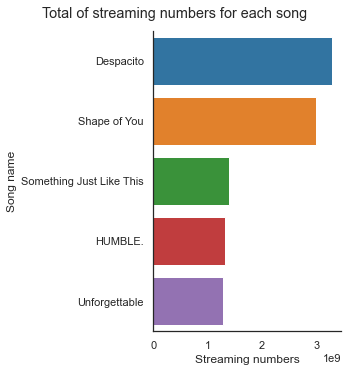

In [341]:
#visualization
sns.set_style('white')
category_order = ['Despacito','Shape of You','Something Just Like This','HUMBLE.','Unforgettable']
g=sns.catplot(x='stream_num',
              y='song_name',
              data=spotify_melt, 
              kind='bar',
              estimator=sum,
              ci=None,
              order=category_order)
g.fig.suptitle('Total of streaming numbers for each song', y = 1.03)
g.set(xlabel='Streaming numbers',
      ylabel='Song name')
plt.show()

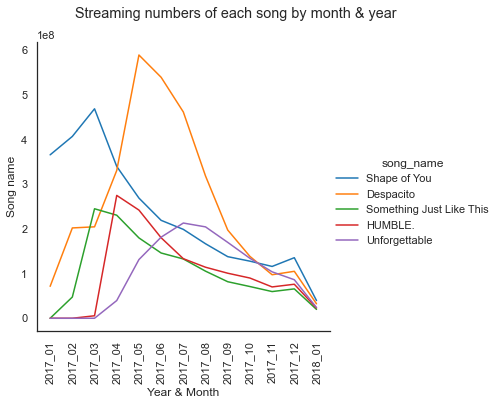

In [342]:
m=sns.relplot(x='year_month', y='stream_num', data=spotify_melt, kind='line', hue='song_name', markers=True)
m.fig.suptitle('Streaming numbers of each song by month & year', y = 1.03)
m.set(xlabel='Year & Month',
      ylabel='Song name')
plt.xticks(rotation=90)
plt.show()

In [344]:
#Insights

#1: During the whole period, Despacito was the most popular song (>3 billion listening times), followed closely by Shape of You. 
    #Despacito & Shape of You each had 2 times larger streaming numbers than that of every other song. 
#2: Despacito had the highest streaming times in 06/2017 (6 million times)
#3: Overall, streaming numbers of all songs went down considerably through time
#4: Before 04/2017, Shape of You was listened the most but then Despacito rose to take the first place since 04/2017 
#5: Unforgettable was released later than others and it had impressive growth from 04/2017 to 07/2017 when it defeated Shape of You to secure the 2nd place.
